# Investigation of Saudi Arabia COVID-19 Cases (Mar 2020 - Oct 2021)

Recently, there has been a huge interest in pandemic COVID-19 studies due that led to major global disruptions. In this investigation I will focus on Saudi Arabia COVID-19 Cases. 
 
## 1. Data Collection 
##### - Questions
- Are the different seasons and events (Summer, Winter, holidays, Eids...) affect the number of COVID-19 cases?
- Do the numbers of COVID-19 cases differ between big/main cities and small cities?
- What is the expected date of reaching zero cases?
- Is the COVID-19 cases indicators expected to rise again after returning back to school ( at 31 Oct 2021)?

##### - Type of Data
Time series data that obtained from The King Abdullah Petroleum Studies and Research Center in CSV format. The dataset include a sequence of data points (COVID-19 cases) indexed in time order from 2 Mar 2020 to 1 Oct 2021. It consists of 428346 row، related to 207 cities in Saudi Arabia. Additionally, it include fetures such:

- Number of Cases (Daily / Cumulative)
- Case Indicators (Active, Mortalities, Critical ...)
- Number of Cases
- Date & Days
- Events
- City & Region

##### - Sources
- https://datasource.kapsarc.org/explore/dataset/saudi-arabia-coronavirus-disease-covid-19-situation/export/?disjunctive.daily_cumulative&disjunctive.indicator&disjunctive.event&disjunctive.city_en&disjunctive.region_en

- https://covid19.moh.gov.sa/
 


## 2.  Exploratory Data Analysis (EDA)
This section shows:
- Distinguishes Attributes
- Detect Outliers and Missing Values
- Features Engineering 
- Features analysis (Uni/multivariate) 
### a. Distinguishes Attributes

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [76]:

dataset = "dataset_covied19.csv"
df = pd.read_csv(dataset, error_bad_lines=False, sep=';')

In [77]:
df.head()

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person)
0,Cumulative,Cases,2020-11-05,NaN,Al Khubar,Eastern Region,7265
1,Cumulative,Cases,2020-11-05,NaN,Jeddah,Makkah Al Mukarramah,33808
2,Cumulative,Cases,2020-11-05,NaN,Ar Riyad,Ar Riyad,57841
3,Cumulative,Cases,2020-11-05,NaN,Ad Duwadimi,Ar Riyad,464
4,Cumulative,Cases,2020-10-28,NaN,Rabigh,Makkah Al Mukarramah,272


In [78]:
df.shape

(428346, 7)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428346 entries, 0 to 428345
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Daily / Cumulative  428346 non-null  object
 1   Indicator           428346 non-null  object
 2   Date                428346 non-null  object
 3   Event               1900 non-null    object
 4   City                428346 non-null  object
 5   Region              428346 non-null  object
 6   Cases (person)      428346 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 22.9+ MB


In [80]:
print('Tha dataset consists information about', df.City.nunique()-1, 'cities  arround Saudi Arabia for ', df.Region.nunique()-1, 'regions.')

Tha dataset consists information about 206 cities  arround Saudi Arabia for  13 regions.


In [81]:
df.Indicator.value_counts()

Cases          145405
Recoveries     140960
Active          94333
Mortalities     45972
Tested           1158
Critical          518
Name: Indicator, dtype: int64

In [82]:
df.City.value_counts()

Total                   5655
Jeddah                  3857
Makkah Al Mukarramah    3788
Ar Riyad                3759
Ad Dammam               3622
                        ... 
Hadda                    154
Al Hadban                 93
Abu 'Urwah                72
Harad                     26
As Sulaymaniyyah          26
Name: City, Length: 207, dtype: int64

In [83]:
df.Event.value_counts()

Curfew lifted(all regions)                                                        939
Partial lifting of curfew in all cities except Makkah                             179
Jeddah areas lockdown - 24 h curfew                                               173
Makkah lockdown                                                                   136
Riyadh, Dammam , Tabuk , Dahran, Hafuf, Jeddah, Taif, Qatif , Khobar24h curfew    115
Jeddah lockdown                                                                    80
Makkah , Madinah 24 hours curfew                                                   79
Riyadh, Makkah and Madinah lockdown - curfew (6am - 3pm)                           70
Domestic flights suspension                                                        40
Gov / private suspension                                                           31
International flights suspension for 14 days                                       27
Umrah suspension                                      

In [84]:
df.Region.value_counts()

Ar Riyad                    70517
Eastern Region              60172
Makkah Al Mukarramah        54090
Aseer                       51448
Jazan                       39088
Al Qaseem                   31495
Al Madinah Al Munawwarah    22057
Al Bahah                    17973
Hail                        17157
Tabuk                       17153
Al Jawf                     14882
Najran                      14319
Northern Borders            12340
Total                        5655
Name: Region, dtype: int64

In [85]:
df.City.value_counts()

Total                   5655
Jeddah                  3857
Makkah Al Mukarramah    3788
Ar Riyad                3759
Ad Dammam               3622
                        ... 
Hadda                    154
Al Hadban                 93
Abu 'Urwah                72
Harad                     26
As Sulaymaniyyah          26
Name: City, Length: 207, dtype: int64

Before doing any Pre-Processing, I will do more discover about 'Daily / Cumulative' column in order to decide what should be informative for the study.

In [86]:
df['Daily / Cumulative'].value_counts()

Cumulative    333140
Daily          95206
Name: Daily / Cumulative, dtype: int64

In [87]:
Cases_Indicator = df[df["Indicator"] == 'Cases']
Cases_Indicator

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person)
0,Cumulative,Cases,2020-11-05,NaN,Al Khubar,Eastern Region,7265
1,Cumulative,Cases,2020-11-05,NaN,Jeddah,Makkah Al Mukarramah,33808
2,Cumulative,Cases,2020-11-05,NaN,Ar Riyad,Ar Riyad,57841
3,Cumulative,Cases,2020-11-05,NaN,Ad Duwadimi,Ar Riyad,464
4,Cumulative,Cases,2020-10-28,NaN,Rabigh,Makkah Al Mukarramah,272
...,...,...,...,...,...,...,...
404845,Cumulative,Cases,2020-12-13,NaN,Thar,Najran,39
404846,Cumulative,Cases,2020-12-31,NaN,Thar,Najran,39
404847,Cumulative,Cases,2021-01-18,NaN,Thar,Najran,39
404848,Cumulative,Cases,2021-01-19,NaN,Thar,Najran,39


In [88]:
Cases_Indicator['Daily / Cumulative'].value_counts()

Cumulative    100188
Daily          45217
Name: Daily / Cumulative, dtype: int64

In [89]:
Cumulative_df = df[df["Daily / Cumulative"] == 'Cumulative']
Cumulative_df

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person)
0,Cumulative,Cases,2020-11-05,NaN,Al Khubar,Eastern Region,7265
1,Cumulative,Cases,2020-11-05,NaN,Jeddah,Makkah Al Mukarramah,33808
2,Cumulative,Cases,2020-11-05,NaN,Ar Riyad,Ar Riyad,57841
3,Cumulative,Cases,2020-11-05,NaN,Ad Duwadimi,Ar Riyad,464
4,Cumulative,Cases,2020-10-28,NaN,Rabigh,Makkah Al Mukarramah,272
...,...,...,...,...,...,...,...
428341,Cumulative,Active,2021-07-01,NaN,Al Lith,Makkah Al Mukarramah,132
428342,Cumulative,Active,2021-07-01,NaN,Badr,Al Madinah Al Munawwarah,76
428343,Cumulative,Active,2021-06-30,NaN,Haql,Tabuk,7
428344,Cumulative,Active,2021-07-01,NaN,Tabarjal,Al Jawf,8


In [90]:
Daily_df = df[df["Daily / Cumulative"] == 'Daily']
Daily_df

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person)
4053,Daily,Cases,2021-07-31,NaN,ʻUrayʻIrah,Eastern Region,2
4054,Daily,Cases,2021-07-31,NaN,ʻUqlat As Suqur,Al Qaseem,4
4055,Daily,Cases,2021-07-31,NaN,Makkah Al Mukarramah,Makkah Al Mukarramah,28
4056,Daily,Cases,2021-07-31,NaN,Najran,Najran,29
4057,Daily,Cases,2021-07-31,NaN,Hubuna,Najran,3
...,...,...,...,...,...,...,...
423322,Daily,Mortalities,2021-05-15,NaN,Al Madinah Al Munawwarah,Al Madinah Al Munawwarah,1
423323,Daily,Mortalities,2021-05-16,NaN,Khamis Mushayt,Aseer,1
423324,Daily,Mortalities,2021-05-16,NaN,Jeddah,Makkah Al Mukarramah,1
423325,Daily,Mortalities,2021-05-16,NaN,Al Qunfudhah,Makkah Al Mukarramah,1


In [91]:
Daily_df['City'].value_counts()

Total                   2274
Jeddah                  1605
Makkah Al Mukarramah    1530
Ar Riyad                1502
Ad Dammam               1366
                        ... 
Abu 'Urwah                 5
Samudah                    4
Harad                      2
As Sulaymaniyyah           2
Hadad Bani Malik           2
Name: City, Length: 207, dtype: int64

In [92]:
Cumulative_df['City'].value_counts()

Total                   3381
Al Qatif                2265
Makkah Al Mukarramah    2258
Ar Riyad                2257
Ad Dammam               2256
                        ... 
Hadda                    125
Al Hadban                 86
Abu 'Urwah                67
Harad                     24
As Sulaymaniyyah          24
Name: City, Length: 207, dtype: int64

In [93]:
Daily_df['Region'].value_counts()

Eastern Region              15825
Ar Riyad                    15215
Makkah Al Mukarramah        12044
Aseer                       11025
Al Qaseem                    7780
Jazan                        7557
Al Madinah Al Munawwarah     5640
Al Bahah                     3541
Najran                       3221
Hail                         3219
Tabuk                        3133
Al Jawf                      2432
Northern Borders             2300
Total                        2274
Name: Region, dtype: int64

In [94]:
Cumulative_df['Region'].value_counts()

Ar Riyad                    55302
Eastern Region              44347
Makkah Al Mukarramah        42046
Aseer                       40423
Jazan                       31531
Al Qaseem                   23715
Al Madinah Al Munawwarah    16417
Al Bahah                    14432
Tabuk                       14020
Hail                        13938
Al Jawf                     12450
Najran                      11098
Northern Borders            10040
Total                        3381
Name: Region, dtype: int64

In [95]:
Daily_df['Indicator'].value_counts()

Cases          45217
Recoveries     44034
Mortalities     5376
Tested           579
Name: Indicator, dtype: int64

In [96]:
Cumulative_df['Indicator'].value_counts()

Cases          100188
Recoveries      96926
Active          94333
Mortalities     40596
Tested            579
Critical          518
Name: Indicator, dtype: int64

In [97]:
Cumulative_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333140 entries, 0 to 428345
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Daily / Cumulative  333140 non-null  object
 1   Indicator           333140 non-null  object
 2   Date                333140 non-null  object
 3   Event               1414 non-null    object
 4   City                333140 non-null  object
 5   Region              333140 non-null  object
 6   Cases (person)      333140 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 20.3+ MB


From shown above, the Daily_df seems to be mor inforattive.

### b. Detect Outliers and Missing Values

In [98]:
#(1)Filling the NaN values in 'Event'
df1 = df.fillna({'Event':'No event'})

In [99]:
#(2) Handel rows that have "Total" value in 'Region' and 'city' columns

df1.drop(df1.loc[df1['Region']=='Total'].index, inplace=True)
df1.drop(df1.loc[df1['City']=='Total'].index, inplace=True)

In [100]:
#(3) Handel rows that have "Tested" value in 'Indicator' column
df1.drop(df1.loc[df1['Indicator']=='Tested'].index, inplace=True)

In [101]:
df1

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person)
0,Cumulative,Cases,2020-11-05,No event,Al Khubar,Eastern Region,7265
1,Cumulative,Cases,2020-11-05,No event,Jeddah,Makkah Al Mukarramah,33808
2,Cumulative,Cases,2020-11-05,No event,Ar Riyad,Ar Riyad,57841
3,Cumulative,Cases,2020-11-05,No event,Ad Duwadimi,Ar Riyad,464
4,Cumulative,Cases,2020-10-28,No event,Rabigh,Makkah Al Mukarramah,272
...,...,...,...,...,...,...,...
428341,Cumulative,Active,2021-07-01,No event,Al Lith,Makkah Al Mukarramah,132
428342,Cumulative,Active,2021-07-01,No event,Badr,Al Madinah Al Munawwarah,76
428343,Cumulative,Active,2021-06-30,No event,Haql,Tabuk,7
428344,Cumulative,Active,2021-07-01,No event,Tabarjal,Al Jawf,8


In [102]:
print ('Shape of dataset befor handling',df.shape)
print ('Shape of dataset After handling',df1.shape)

Shape of dataset befor handling (428346, 7)
Shape of dataset After handling (422691, 7)


### c. Feature Engineering 


In [103]:
#(1) Convert 'Data' type
df1['Date'] = pd.to_datetime(df1['Date'])

In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422691 entries, 0 to 428345
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Daily / Cumulative  422691 non-null  object        
 1   Indicator           422691 non-null  object        
 2   Date                422691 non-null  datetime64[ns]
 3   Event               422691 non-null  object        
 4   City                422691 non-null  object        
 5   Region              422691 non-null  object        
 6   Cases (person)      422691 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 41.9+ MB


In [105]:
#(2) Add 'Day_name' column
df1['Day_name'] = df1['Date'].dt.day_name() 

In [106]:
#(3) Add 'Day','year' and 'month' column
df1['Day'] = df1['Date'].dt.day
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year

In [111]:
#(4) Rename 'Cases (person)' column
df1 = df1.rename(columns = {'Cases (person)':'Cases'}, inplace = False)

In [110]:
#(5)Rearrange Features
df1 = df1 [["Date","Day_name","Day","Month","Year","Cases","City","Region","Indicator","Event","Daily / Cumulative"]]
df1

,Date,Day_name,Day,Month,Year,Cases,City,Region,Indicator,Event,Daily / Cumulative
0,2020-11-05,Thursday,5,11,2020,7265,Al Khubar,Eastern Region,Cases,No event,Cumulative
1,2020-11-05,Thursday,5,11,2020,33808,Jeddah,Makkah Al Mukarramah,Cases,No event,Cumulative
2,2020-11-05,Thursday,5,11,2020,57841,Ar Riyad,Ar Riyad,Cases,No event,Cumulative
3,2020-11-05,Thursday,5,11,2020,464,Ad Duwadimi,Ar Riyad,Cases,No event,Cumulative
4,2020-10-28,Wednesday,28,10,2020,272,Rabigh,Makkah Al Mukarramah,Cases,No event,Cumulative
...,...,...,...,...,...,...,...,...,...,...,...
428341,2021-07-01,Thursday,1,7,2021,132,Al Lith,Makkah Al Mukarramah,Active,No event,Cumulative
428342,2021-07-01,Thursday,1,7,2021,76,Badr,Al Madinah Al Munawwarah,Active,No event,Cumulative
428343,2021-06-30,Wednesday,30,6,2021,7,Haql,Tabuk,Active,No event,Cumulative
428344,2021-07-01,Thursday,1,7,2021,8,Tabarjal,Al Jawf,Active,No event,Cumulative


In [116]:
#(6) Extrat the 'Daily / Cumulative' cases
df_dailey = df1.loc[df1['Daily / Cumulative'] == 'Daily']
df_Cumulative = df1.loc[df1['Daily / Cumulative'] == 'Cumulative']

In [117]:
#(7) drop un-needed column from df_dailey
df_dailey.drop(df_dailey.columns[[10]], axis = 1) 

,Date,Day_name,Day,Month,Year,Cases,City,Region,Indicator,Event
4053,2021-07-31,Saturday,31,7,2021,2,ʻUrayʻIrah,Eastern Region,Cases,No event
4054,2021-07-31,Saturday,31,7,2021,4,ʻUqlat As Suqur,Al Qaseem,Cases,No event
4055,2021-07-31,Saturday,31,7,2021,28,Makkah Al Mukarramah,Makkah Al Mukarramah,Cases,No event
4056,2021-07-31,Saturday,31,7,2021,29,Najran,Najran,Cases,No event
4057,2021-07-31,Saturday,31,7,2021,3,Hubuna,Najran,Cases,No event
...,...,...,...,...,...,...,...,...,...,...
423322,2021-05-15,Saturday,15,5,2021,1,Al Madinah Al Munawwarah,Al Madinah Al Munawwarah,Mortalities,No event
423323,2021-05-16,Sunday,16,5,2021,1,Khamis Mushayt,Aseer,Mortalities,No event
423324,2021-05-16,Sunday,16,5,2021,1,Jeddah,Makkah Al Mukarramah,Mortalities,No event
423325,2021-05-16,Sunday,16,5,2021,1,Al Qunfudhah,Makkah Al Mukarramah,Mortalities,No event


### d. Features Analysis


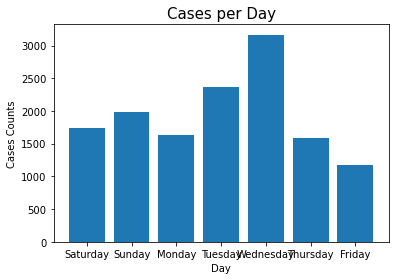

In [124]:
#PLOT Day & Cases

new_x = df_dailey.Day_name
new_y = df_dailey.Cases

plt.bar(new_x,new_y)
plt.xlabel('Day')
plt.ylabel('Cases Counts')
plt.title('Cases per Day', size = 15);

As shown above, Wednesday hav the maximum average cases. 
قد يعود تفسير هذا الامر الى كثرة الاجتماعات والمخالطة في نهاية الأسبوع، إذ أنه بحسب الدراسات الأعراض للمصاب لا تظهر إلا بعد أربعة أيام

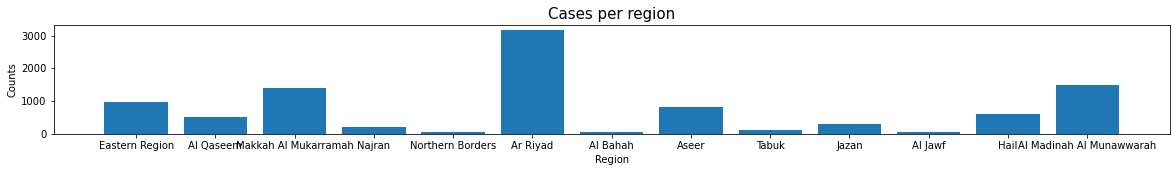

In [120]:
#PLOT average cases per region
plt.figure(figsize = [20,2])
x_reg = df_dailey.Region
y_reg = df_dailey.Cases

plt.bar(x_reg,y_reg )
plt.xlabel('Region')
plt.ylabel('Counts')
plt.title('Cases per region', size = 15);

As shown, Riyadh have the most maximum average cases during the two years, then Madinah and Makkah

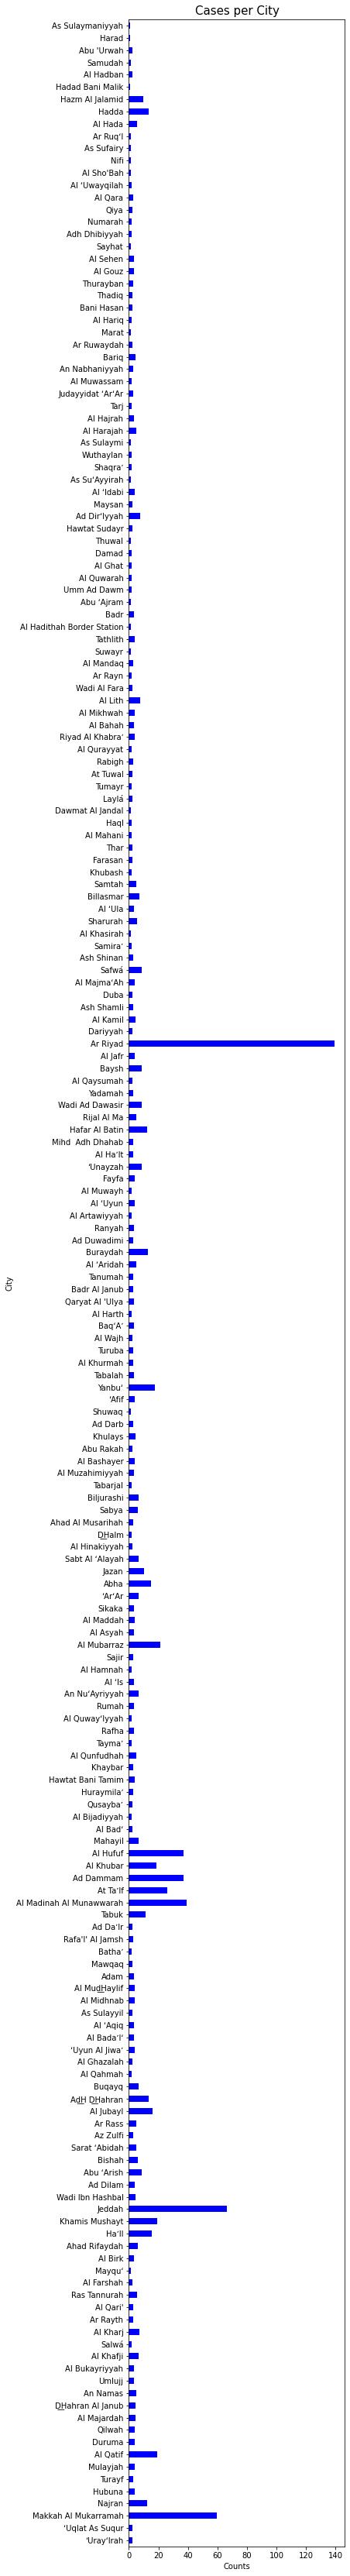

In [121]:
#PLOT average cases per city
cases_per_city = df_dailey.groupby(['City'], sort=False)['Cases'].mean()
#cases_per_city
plt.figure(figsize = [5,60])

cases_per_city.plot(kind = 'barh', colormap = 'winter')
plt.xlabel('Counts')
plt.ylabel('City')
plt.title('Cases per City', size = 15);


الملاحظ أنه في المدن الكبرى تزداد الحالات ، قد يرجع هذا الي ازديااد عدد لاسكان ، او ربما زيادة الوعي والحرص للذهاب واجراء الفحوصات 

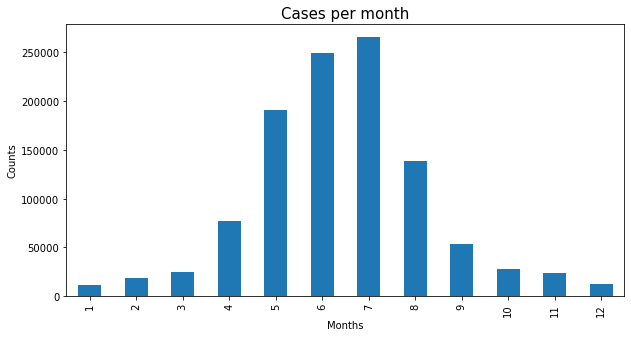

In [123]:
# PLOT cases_per_month
cases_per_month = df_dailey.groupby(['Month'], sort=True)['Cases'].sum()
plt.figure(figsize = [10,5])
cases_per_month.plot(kind = 'bar')
plt.xlabel('Months')
plt.ylabel('Counts')
plt.title('Cases per month', size = 15);

الملاحظ انه في اشعر العطلة تزداد الحالات

## 3. Train Model on Data
- Data Encoading
- Data Splitting (Training/Testing)
- Model Building

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, r2_score, mean_squared_error

### a. Data Encoading

* Feature variable (input): Date, City, event
* Target variable (Output): Cases

In [126]:
#Encod 'City' values
City_dummies = pd.get_dummies(df_dailey.City)

In [127]:
#Encod 'Event' values
Event_dummies =  pd.get_dummies(df_dailey.Event)

In [ ]:
#Day_dummies = pd.get_dummies(df_dailey.Day_name)
#Indicator_dummies = pd.get_dummies(df_dailey.Indicator)

In [ ]:
merged_df = pd.concat([df_dailey,City_dummies],axis = 'columns')
merged_df

In [ ]:
final_df_dailey = merged_df.drop(['Day','','Region','Daily / Cumulative'],axis = 'columns')
final_df_dailey

### b. Data Splitting (Training/Testing)

In [ ]:
X, y = df_dailey.drop('Cases',axis=1), df_dailey['Cases']

# 80% training 20% testing
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2)

In [ ]:
print ('All data shape' ,df_dailey.shape )
print ('X_train sape :' ,X_train.shape )
print ('y_train sape :' ,y_train.shape )
print ('X_test sape :' ,X_test.shape )
print ('y_test sape :' ,y_test.shape )

### c. Model Building

In [ ]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

In [ ]:
coff = r2_score(y_test, y_Prediction)
error = mean_squared_error(y_test, y_Prediction)

print('R^2 = ', coff )
print('Mean Squared Error ' , error )

## 4. Analysis and Evaluation 
- Evaluation Metrics 


## 5. Conclusion 